# Authorship classification

Now that we've gotten all the tf-idf and word frequency counts, let's run k-means clustering, and then compare the two.

In [11]:
import sklearn.cluster as sk
import pandas as pd

freq = pd.read_csv('non_tf_idf.csv')
tfidf = pd.read_csv('tf_idf.csv')

In [22]:
no_author_freq = freq.drop(labels=['meta-author', 'meta-text'], axis=1)
no_author_tfidf = tfidf.drop(labels=['meta-author', 'meta-text'], axis=1)

In [29]:
num_authors = len(set(freq['meta-author']))
freq_model = sk.KMeans(n_clusters=num_authors)
tfidf_model = sk.KMeans(n_clusters=num_authors)

In [30]:
freq_res = freq_model.fit(no_author_freq)
tfiidf_res = tfidf_model.fit(no_author_tfidf)

/Users/connorhanley/anaconda3/envs/lingstats/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/connorhanley/anaconda3/envs/lingstats/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/connorhanley/anaconda3/envs/lingstats/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/connorhanley/anaconda3/envs/lingstats/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarni

In [47]:
freq['cluster'] = freq_res.labels_
tfidf['cluster'] = tfiidf_res.labels_

freq_clusters = {}
tfidf_clusters = {}

for i in range(num_authors):
    freq_clusters[i] =freq[freq.cluster == i]['meta-author'].value_counts()
    tfidf_clusters[i] = tfidf[tfidf.cluster == i]['meta-author'].value_counts()

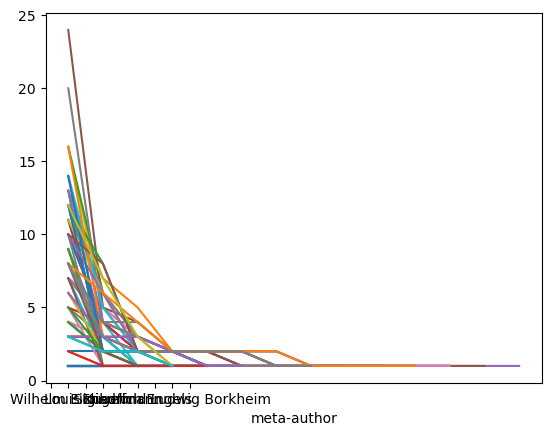

In [52]:
for key, values in freq_clusters.items():
    values.plot()

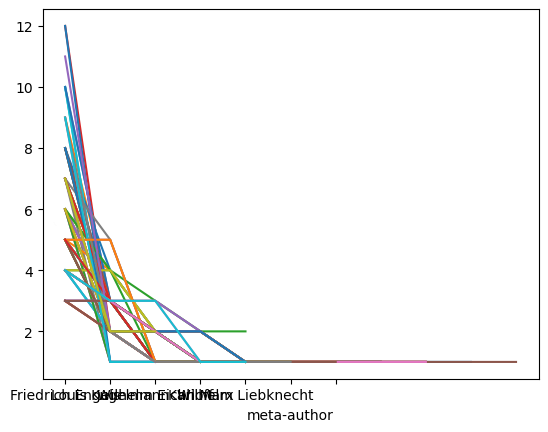

In [53]:
for key, values in tfidf_clusters.items():
    values.plot()